# Projet IN013


Installations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from visual import brushes_to_image, extract_features,compute_edge_map, convert_rgb_to_lab
from solver import run_solver, get_kmeans_clusters
import os

from visual import load_brush_library, compute_gradient_orientation

from visual import BrushStroke


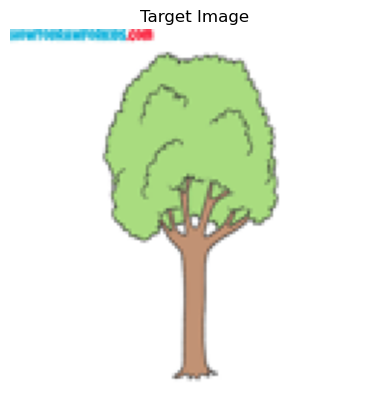

In [2]:
def load_image(path, size=(128, 128)):
    img = Image.open(path).convert("RGB")
    img = img.resize(size)
    return np.array(img)

target_img = load_image("tree.jpg", size=(128, 128))
gradient_map = compute_gradient_orientation(target_img)


CANVAS_SIZE = (128, 128)
plt.imshow(target_img)
plt.axis("off")
plt.title("Target Image")
plt.show()

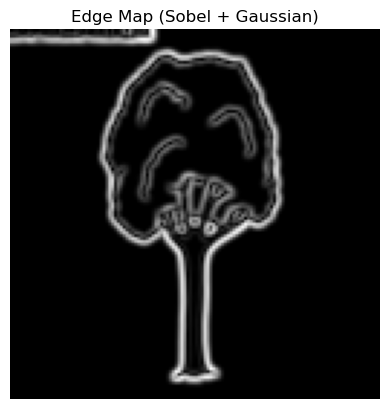

In [3]:
target_lab = convert_rgb_to_lab(target_img)
edge_map = compute_edge_map(target_img)

plt.imshow(edge_map, cmap='gray')
plt.axis("off")
plt.title("Edge Map (Sobel + Gaussian)")
plt.show()

In [4]:
# Load brushes here (once and for all)
brush_lib = load_brush_library('brushes/watercolor')

# Call solver
final_population, fitness_log, _ = run_solver(
    target_rgb=target_img,
    gradient_map=compute_gradient_orientation(target_img),
    generations=50,
    pop_size=50
)



🖌️ Loaded 5 brushes from brushes/watercolor
🖌️ Loaded 5 brushes from brushes/watercolor
[📦] Total brushes loaded: 5

🧪 Stage: 40 strokes, 20 generations
Gen 1 | Fitness: 7.2578 | Novelty: 4.5305
Gen 2 | Fitness: 7.2578 | Novelty: 3.6278
Gen 3 | Fitness: 7.2577 | Novelty: 2.2471
Gen 4 | Fitness: 7.2554 | Novelty: 1.2716
Gen 5 | Fitness: 7.2554 | Novelty: 1.3087
Gen 6 | Fitness: 7.2554 | Novelty: 1.2698
Gen 7 | Fitness: 7.2554 | Novelty: 1.2668
Gen 8 | Fitness: 7.2554 | Novelty: 1.2722
Gen 9 | Fitness: 7.2554 | Novelty: 1.2716
Gen 10 | Fitness: 7.2208 | Novelty: 5.3233
Gen 11 | Fitness: 7.2208 | Novelty: 5.2646
Gen 12 | Fitness: 7.2208 | Novelty: 5.3420
Gen 13 | Fitness: 7.0668 | Novelty: 5.0882
Gen 14 | Fitness: 7.0668 | Novelty: 5.1720
Gen 15 | Fitness: 7.0668 | Novelty: 5.0585
Gen 16 | Fitness: 7.0668 | Novelty: 4.7970
Gen 17 | Fitness: 7.0668 | Novelty: 4.7645
Gen 18 | Fitness: 7.0668 | Novelty: 4.7744
Gen 19 | Fitness: 7.0668 | Novelty: 4.1836
Gen 20 | Fitness: 7.0093 | Novelty: 4.8

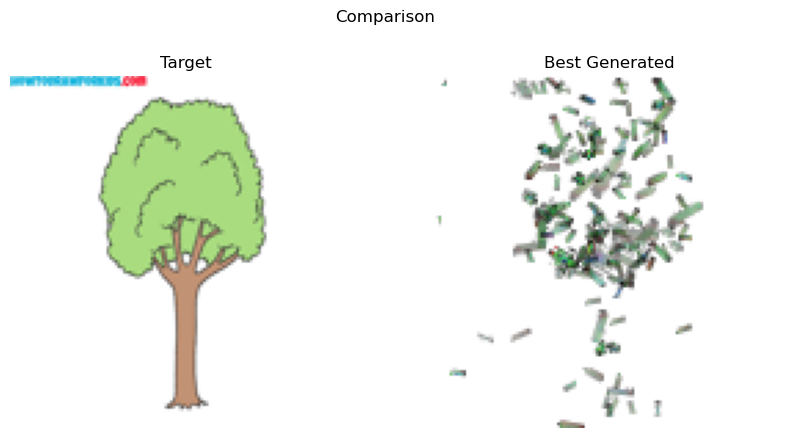

In [5]:
from solver import unflatten_genome

# --- Show the Best Result ---

best_image = final_population[0].rendered

if best_image is not None:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(target_img)
    plt.axis("off")
    plt.title("Target")

    plt.subplot(1, 2, 2)
    plt.imshow(best_image)
    plt.axis("off")
    plt.title("Best Generated")

    plt.suptitle("Comparison")
    plt.show()
else:
    print("⚠️ No rendered image found in best individual.")



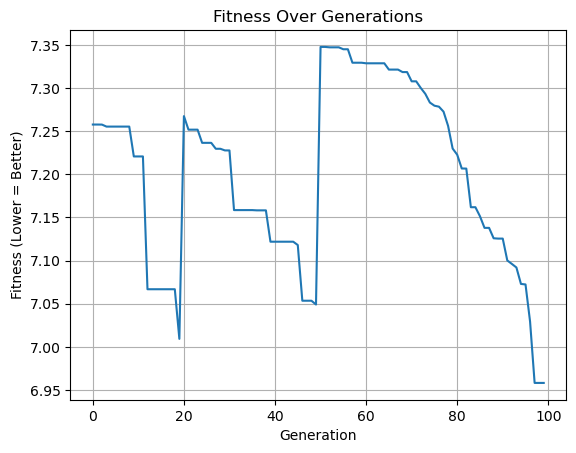

In [6]:
plt.plot(fitness_log)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (Lower = Better)")
plt.grid()
plt.show()

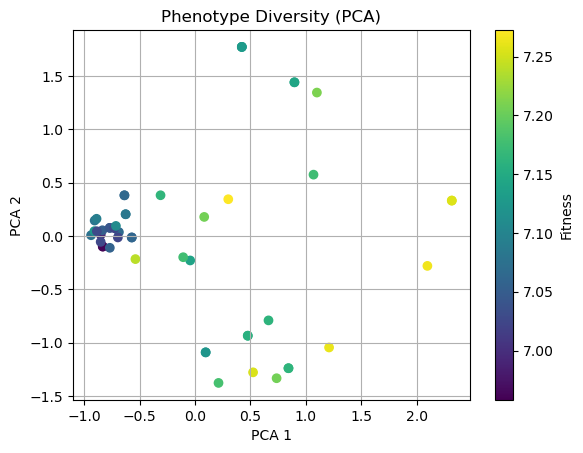

In [7]:
from sklearn.decomposition import PCA

features = [extract_features(brushes_to_image(unflatten_genome(ind), brush_lib)) for ind in final_population]
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

colors = [ind.fitness.values[0] for ind in final_population]
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=colors, cmap='viridis')
plt.colorbar(label="Fitness")
plt.title("Phenotype Diversity (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()


In [8]:
from visual import images_to_gif

from IPython.display import Image as IPyImage, display

# Save the frames
os.makedirs("out", exist_ok=True)
frames = [brushes_to_image(unflatten_genome(ind), brush_lib) for ind in final_population[:20]]
images_to_gif(frames, "out/evolution.gif", duration=200)

# Display the gif in notebook
print("GIF saved to out/evolution.gif")
#display(IPyImage(filename="out/evolution.gif"))

GIF saved to out/evolution.gif


In [9]:
# --- Save Top Pareto Individuals ---
pareto_sorted = sorted(final_population, key=lambda x: (x.fitness.values[0], -x.fitness.values[1]))[:5]
if not os.path.exists("out"):
    os.makedirs("out")
for i, ind in enumerate(pareto_sorted):
    img = brushes_to_image(unflatten_genome(ind), brush_lib)
    Image.fromarray(img).save(f"out/pareto_{i}.png")

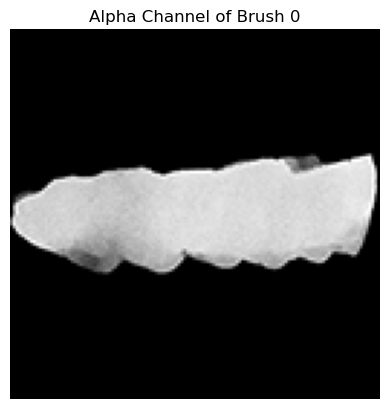

In [10]:
# Debug

import cv2
import matplotlib.pyplot as plt

# Load brush with alpha channel
brush = cv2.imread("brushes/watercolor/0.png", cv2.IMREAD_UNCHANGED)

# Check shape and extract alpha
if brush.shape[-1] == 4:
    alpha = brush[:, :, 3]
    plt.imshow(alpha, cmap="gray")
    plt.title("Alpha Channel of Brush 0")
    plt.axis("off")
    plt.show()
else:
    print("No alpha channel found!")


🖌️ Loaded 5 brushes from brushes/watercolor


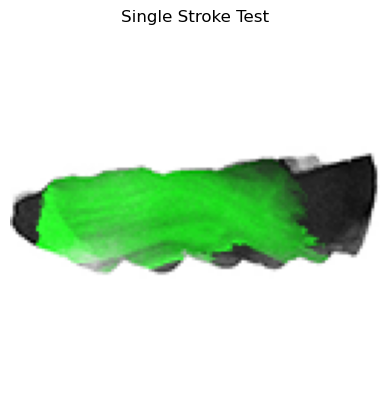

In [2]:
# Debug: visualize one stroke

brush_lib = load_brush_library('brushes/watercolor')
test_canvas = np.ones((128, 128, 3), dtype=np.uint8) * 255
stroke = BrushStroke(
    brush_id=0,
    x=64, y=64,
    size=1.0,
    rotation=0,
    color=(0, 255, 0),
    opacity=1.0
)
output = stroke.render(test_canvas, brush_lib)
plt.imshow(output)
plt.title("Single Stroke Test")
plt.axis("off")
plt.show()

C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


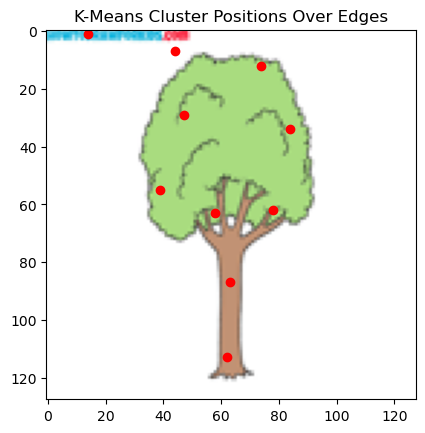

In [4]:
import matplotlib.pyplot as plt

positions, _ = get_kmeans_clusters(target_img, n_clusters=10)

plt.imshow(target_img)
for x, y in positions:
    plt.scatter(x, y, c='red')
plt.title("K-Means Cluster Positions Over Edges")
plt.show()